In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',40)
pd.set_option('max_colwidth',1000)

In [3]:
Traffic = pd.read_csv('accidents_2012_to_2014.csv')
Traffic.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,NaN,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
464696,2.01E+12,314072,579971,-3.348426,55.106700,98,3,2,2,24/12/2014,4,15:00,917,S12000006,4,723,Single carriageway,60,NaN,Giveway or uncontrolled,4,7076,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [4]:
Traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
Accident_Index                                 464697 non-null object
Location_Easting_OSGR                          464697 non-null int64
Location_Northing_OSGR                         464697 non-null int64
Longitude                                      464697 non-null float64
Latitude                                       464697 non-null float64
Police_Force                                   464697 non-null int64
Accident_Severity                              464697 non-null int64
Number_of_Vehicles                             464697 non-null int64
Number_of_Casualties                           464697 non-null int64
Date                                           464697 non-null object
Day_of_Week                                    464697 non-null int64
Time                                           464684 non-null object
Local_Authority_(District)                     464697 

In [5]:
Traffic.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,464697.000000,4.646970e+05,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,0.0,464697.000000,464697.000000,464697.000000,464697.000000
mean,443834.284222,2.986258e+05,-1.375156,52.575498,28.504051,2.833461,1.828086,1.334420,4.108740,329.123829,4.070136,1012.728324,38.229793,NaN,2.786293,380.952317,1.337426,2012.928140
std,94098.865933,1.594701e+05,1.382137,1.436370,25.334899,0.402029,0.708703,0.821047,1.916429,259.222621,1.413850,1810.523701,13.800546,NaN,3.187084,1289.786824,0.472832,0.834536
min,65510.000000,1.029000e+04,-7.509162,49.912941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000
25%,379059.000000,1.777100e+05,-2.315799,51.484841,6.000000,3.000000,1.000000,1.000000,2.000000,95.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000
50%,445539.000000,2.606800e+05,-1.323374,52.232169,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,3.000000,147.000000,30.000000,NaN,3.000000,0.000000,1.000000,2013.000000
75%,525350.000000,3.989590e+05,-0.192935,53.485973,45.000000,3.000000,2.000000,1.000000,6.000000,511.000000,6.000000,759.000000,40.000000,NaN,6.000000,0.000000,2.000000,2014.000000
max,655370.000000,1.190858e+06,1.759382,60.597984,98.000000,3.000000,67.000000,93.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2014.000000


In [6]:
Traffic.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [7]:
Traffic['Time'].unique() # 13 nan values

array(['20:35', '17:00', '10:07', ..., '04:18', '04:39', nan],
      dtype=object)

In [8]:
Traffic['Time'].fillna(value=Traffic['Time'].mode().index[0], inplace = True)
Traffic['Time'].isnull().sum()

0

In [9]:
Traffic['Junction_Detail'].unique() # 464697

array([nan])

In [10]:
Traffic.drop('Junction_Detail', axis = 1, inplace = True)
pd.DataFrame(Traffic.keys())

,0
0,Accident_Index
1,Location_Easting_OSGR
2,Location_Northing_OSGR
3,Longitude
4,Latitude
5,Police_Force
6,Accident_Severity
7,Number_of_Vehicles
8,Number_of_Casualties
9,Date


In [11]:
Traffic['Junction_Control'].unique() # 178610

array(['Automatic traffic signal', 'Giveway or uncontrolled', nan,
       'Authorised person', 'Stop Sign'], dtype=object)

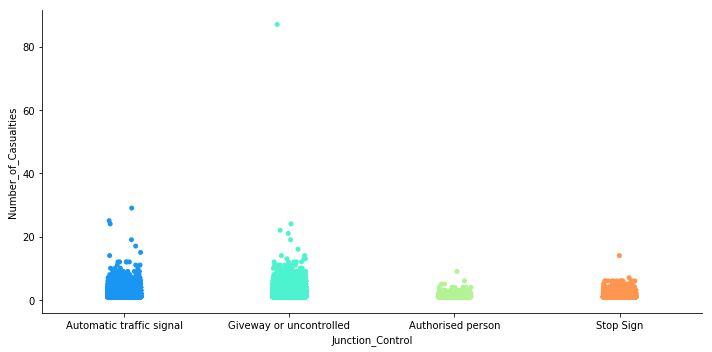

In [12]:
sns.catplot(x = 'Junction_Control', y = 'Number_of_Casualties', data = Traffic, color = True, palette = 'rainbow', height = 5, aspect = 2);

In [13]:
Traffic['Number_of_Casualties'].unique()

array([ 1,  2,  4,  3,  6,  5,  7,  9,  8, 11, 10, 12, 13, 15, 42, 16, 17,
       14, 19, 25, 33, 38, 24, 23, 29, 22, 46, 26, 70, 21, 18, 87, 20, 41,
       93, 27, 54], dtype=int64)

In [14]:
Traffic[Traffic['Number_of_Casualties'] == 54]['Junction_Control']

446421    NaN
Name: Junction_Control, dtype: object

In [15]:
def impute_control(cols):
    Junction_Control = cols[0]
    Accident_Severity = cols[1]

    if pd.isnull(Junction_Control):
        
        if Accident_Severity == 1:
            return 'Stop Sign'
    
        elif Accident_Severity == 2:
            return 'Automatic traffic signal'
    
        else:
            return 'Giveway or uncontrolled'
    else:
        return Junction_Control

Traffic['Junction_Control'] = Traffic[['Junction_Control','Accident_Severity']].apply(impute_control,axis=1)

In [16]:
Traffic.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Control                              

In [17]:
Traffic['Road_Surface_Conditions'].unique() # 755

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [18]:
a = Traffic[Traffic['Road_Surface_Conditions']=='Frost/Ice']
Traffic.drop(a.index, inplace = True)
Traffic['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Snow', 'Flood (Over 3cm of water)', nan],
      dtype=object)

In [19]:
b = Traffic[Traffic['Road_Surface_Conditions']=='Snow']
Traffic.drop(b.index, inplace = True)
Traffic['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet/Damp', 'Flood (Over 3cm of water)', nan], dtype=object)

In [20]:
Traffic['Road_Surface_Conditions'].isnull().sum()

755

In [21]:
Traffic[Traffic['Road_Surface_Conditions'] == 'Flood (Over 3cm of water)']['Number_of_Casualties'].count()

863

In [22]:
def impute_conditions(cols):
    Road_Surface_Conditions = cols[0]
    Accident_Severity = cols[1]

    if pd.isnull(Road_Surface_Conditions):
        
        if Accident_Severity == 1:
            return 'Flood (Over 3cm of water)'
    
        elif Accident_Severity == 2:
            return 'Wet/Damp'
    
        else:
            return 'Dry'
    else:
        return Road_Surface_Conditions

Traffic['Road_Surface_Conditions'] = Traffic[['Road_Surface_Conditions','Accident_Severity']].apply(impute_conditions,axis=1)

In [23]:
Traffic.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Control                              

In [24]:
Traffic['Special_Conditions_at_Site'].unique() #2

array(['None', 'Roadworks', 'Mud', 'Auto traffic singal out',
       'Ol or diesel', 'Auto traffic signal partly defective',
       'Road surface defective',
       'Permanent sign or marking defective or obscured', nan],
      dtype=object)

In [25]:
Traffic['Junction_Control'].unique()

array(['Automatic traffic signal', 'Giveway or uncontrolled', 'Stop Sign',
       'Authorised person'], dtype=object)

In [26]:
Traffic['Special_Conditions_at_Site'].fillna(value=Traffic['Special_Conditions_at_Site'].mode().index[0], inplace = True)
Traffic['Special_Conditions_at_Site'].isnull().sum()

0

In [27]:
Traffic['Carriageway_Hazards'].unique() #3

array(['None', 'Other object in carriageway',
       'Any animal (except a ridden horse)',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident', nan], dtype=object)

In [28]:
Traffic['Carriageway_Hazards'].fillna(value=Traffic['Carriageway_Hazards'].mode().index[0], inplace = True)
Traffic['Carriageway_Hazards'].isnull().sum()

0

In [29]:
Traffic['Did_Police_Officer_Attend_Scene_of_Accident'].unique() #2

array(['Yes', 'No', nan], dtype=object)

In [30]:
Traffic['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value=Traffic['Did_Police_Officer_Attend_Scene_of_Accident'].mode().index[0], inplace = True)
Traffic['Did_Police_Officer_Attend_Scene_of_Accident'].isnull().sum()

0

In [31]:
Traffic['LSOA_of_Accident_Location'].unique() # 28718

array(['E01002821', 'E01004760', 'E01002893', ..., 'W01000508',
       'W01000567', 'W01000504'], dtype=object)

In [32]:
Traffic.dropna(inplace = True)

In [33]:
Traffic.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [34]:
Traffic.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [35]:
Traffic.shape

(426260, 32)

In [36]:
Traffic.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
455903,201463DP40114,314240,293390,-3.265712,52.531575,63,3,1,3,01/11/2014,7,20:45,753,W06000023,4,4389,Single carriageway,60,Giveway or uncontrolled,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,W01000481,2014
455904,201463DP40214,313050,291200,-3.282677,52.511702,63,3,1,2,09/11/2014,1,18:54,753,W06000023,3,489,Single carriageway,60,Giveway or uncontrolled,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,None,None,2,Yes,W01000480,2014
455905,201463DP40314,315230,326460,-3.259644,52.828952,63,3,2,1,09/12/2014,3,19:55,753,W06000023,4,4396,Single carriageway,60,Giveway or uncontrolled,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,W01001907,2014
455906,201463DP40414,303140,228320,-3.410628,51.944879,63,3,2,1,21/12/2014,1,18:40,753,W06000023,3,470,Roundabout,40,Giveway or uncontrolled,3,40,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Unknown,Wet/Damp,None,None,2,No,W01000489,2014
455907,201463DP40514,325530,319340,-3.105177,52.766481,63,2,1,1,19/10/2014,1,12:40,753,W06000023,4,4393,Single carriageway,30,Automatic traffic signal,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,W01000458,2014


In [37]:
Traffic['Police_Force'].unique()

array([ 1, 48,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22,
       23, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47,
       50, 52, 53, 54, 55, 60, 61, 62, 63], dtype=int64)

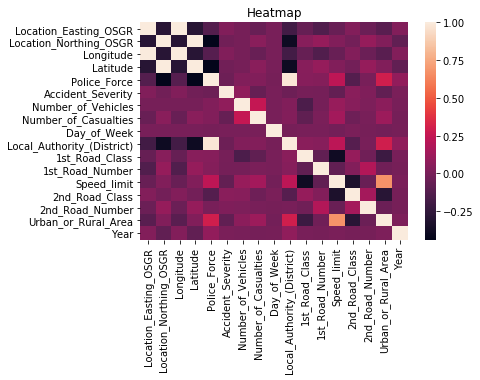

In [38]:
sns.heatmap(Traffic.corr())
plt.title('Heatmap')
plt.savefig('Heatmap.png', dpi= 80)

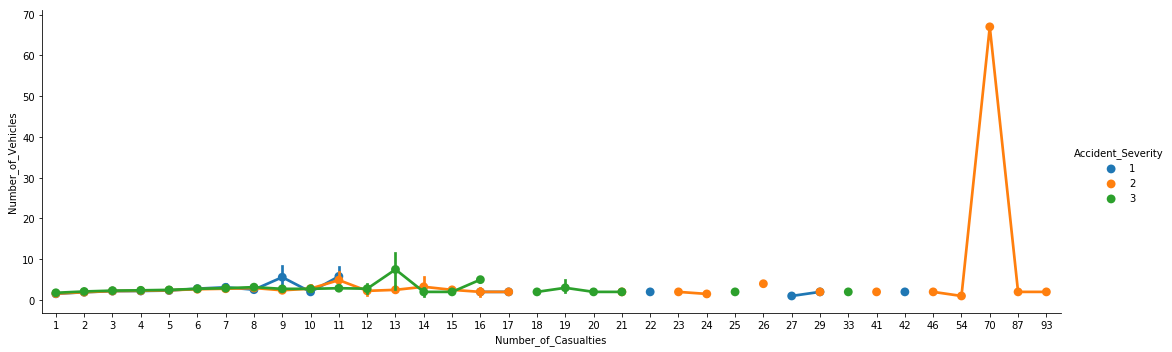

In [39]:
fig1=sns.catplot(x='Number_of_Casualties',y = 'Number_of_Vehicles', hue = 'Accident_Severity', kind='point',aspect = 3, data=Traffic)
fig1

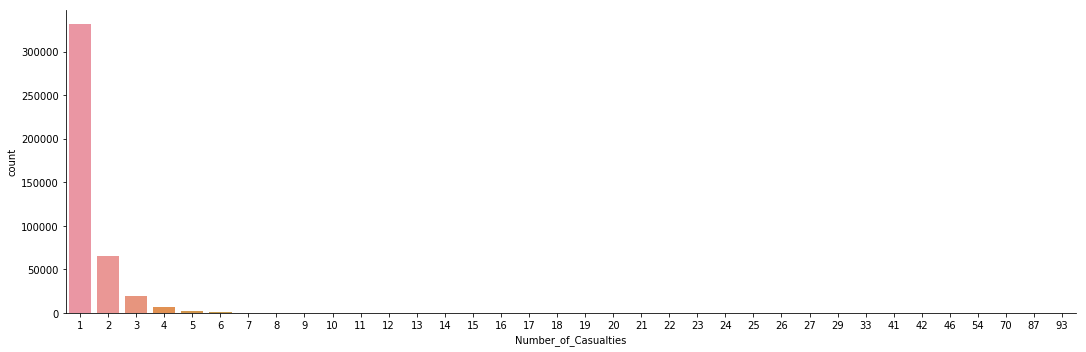

In [40]:
fig=sns.catplot(x='Number_of_Casualties', kind='count',aspect = 3, data=Traffic)
plt.ylim(1,)
fig

In [41]:
fig.savefig("Number of Casualties Count.png")

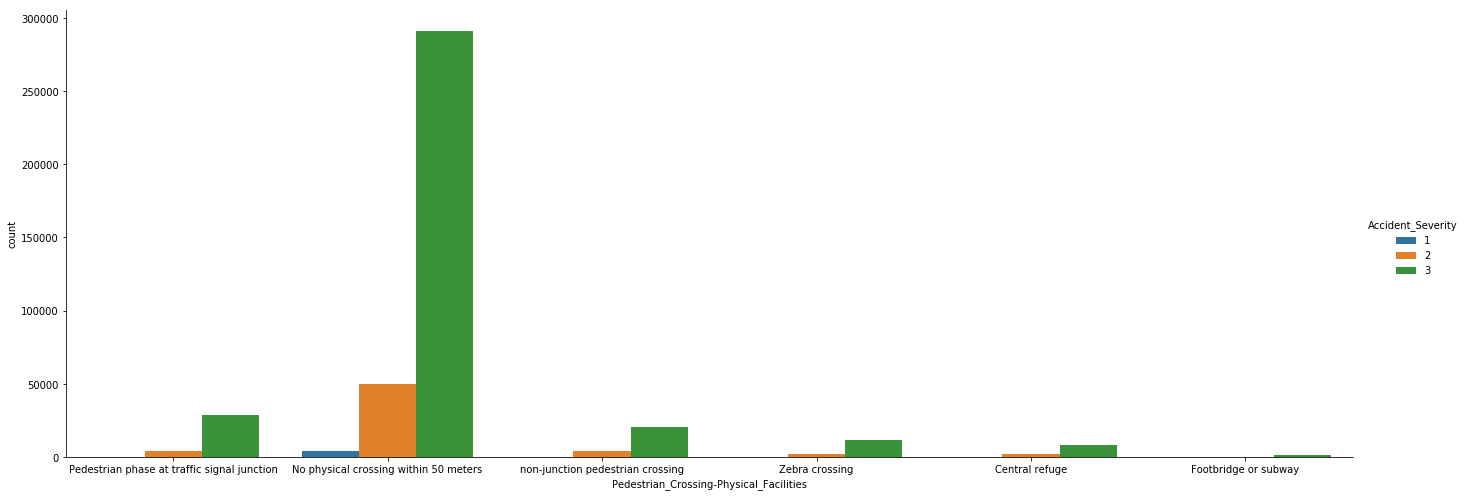

In [42]:
Pedestrians = sns.catplot(x='Pedestrian_Crossing-Physical_Facilities',hue='Accident_Severity',kind='count',data=Traffic, height=7, aspect=2.7)
Pedestrians

In [43]:
Pedestrians.savefig('Pedestrian Crossing Vs Accident Severity.png', dpi =85)

In [44]:
Traffic['Special_Conditions_at_Site'].unique()

array(['None', 'Roadworks', 'Mud', 'Auto traffic singal out',
       'Ol or diesel', 'Auto traffic signal partly defective',
       'Road surface defective',
       'Permanent sign or marking defective or obscured'], dtype=object)

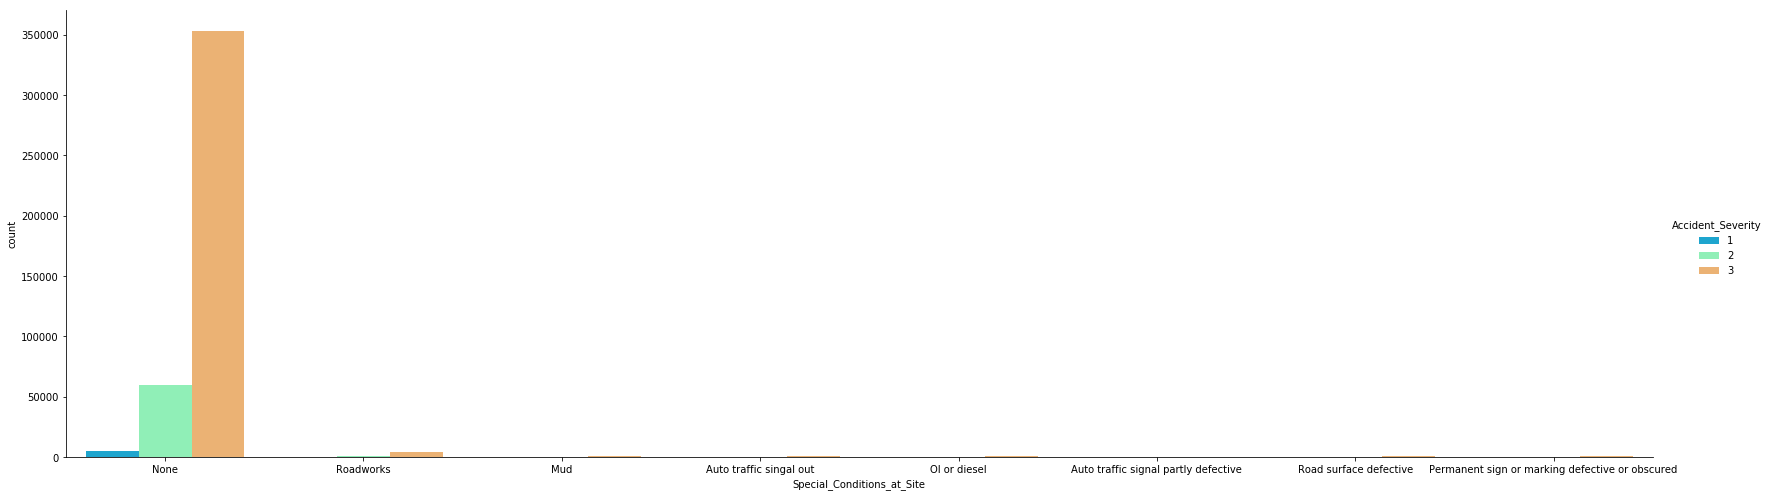

In [45]:
Special_Conditions = sns.catplot(x='Special_Conditions_at_Site',hue='Accident_Severity',kind='count',data=Traffic, palette = 'rainbow',height=7, aspect=3.3)
Special_Conditions

In [46]:
Special_Conditions.savefig('Special_Conditions Vs Accident Severity.png', dpi =85)

In [47]:
Traffic['Hour'] = Traffic['Time'].str[0:2]
Traffic['Hour'] = pd.to_numeric(Traffic['Hour'])
Traffic = Traffic.dropna(subset=['Hour'])
Traffic['Hour'] = Traffic['Hour'].astype('int')

In [48]:
def time_of_day(hour):
    if hour >= 5 and hour <10:
        return 'morning rush (5am - 10am)'
    elif hour >=10 and hour <15:
        return 'office hours (10am - 3pm)'
    elif hour >=15 and hour <19:
        return 'afternoon rush (3pm - 7pm)'
    elif hour >=19 and hour <23:
        return 'evening (7pm - 11pm)'
    else:
        return 'night (11pm - 5am)'
Traffic['Daytime'] = Traffic['Hour'].apply(time_of_day)
Traffic[['Time','Hour','Daytime']].head(10)

,Time,Hour,Daytime
0,20:35,20,evening (7pm - 11pm)
1,17:00,17,afternoon rush (3pm - 7pm)
2,10:07,10,office hours (10am - 3pm)
3,12:20,12,office hours (10am - 3pm)
4,20:24,20,evening (7pm - 11pm)
5,07:30,7,morning rush (5am - 10am)
6,14:00,14,office hours (10am - 3pm)
7,11:29,11,office hours (10am - 3pm)
8,13:55,13,office hours (10am - 3pm)
9,19:40,19,evening (7pm - 11pm)


In [49]:
Traffic.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Daytime
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012,20,evening (7pm - 11pm)
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012,17,afternoon rush (3pm - 7pm)
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,10,office hours (10am - 3pm)
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,12,office hours (10am - 3pm)
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,20,evening (7pm - 11pm)


In [50]:
Traffic.drop('Time', axis = 1, inplace = True)
Traffic.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Daytime
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,12,E09000020,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012,20,evening (7pm - 11pm)
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,1,E09000033,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012,17,afternoon rush (3pm - 7pm)
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,12,E09000020,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,10,office hours (10am - 3pm)
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,12,office hours (10am - 3pm)
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,12,E09000020,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,20,evening (7pm - 11pm)


In [51]:
Time_of_day = Traffic.groupby('Daytime')
Time_of_day.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Daytime
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,12,E09000020,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012,20,evening (7pm - 11pm)
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,1,E09000033,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012,17,afternoon rush (3pm - 7pm)
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,12,E09000020,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,10,office hours (10am - 3pm)
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,12,office hours (10am - 3pm)
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,12,E09000020,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,20,evening (7pm - 11pm)
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,5,12,E09000020,3,308,Single carriageway,30,Automatic traffic signal,3,3220,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012,7,morning rush (5am - 10am)
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,5,1,E09000033,3,3216,Single carriageway,30,Automatic traffic signal,3,4,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012,14,office hours (10am - 3pm)
7,201201BS70008,524010,182080,-0.213862,51.523975,1,3,2,1,07/01/2012,7,12,E09000020,4,450,Roundabout,30,Giveway or uncontrolled,5,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002905,2012,11,office hours (10am - 3pm)
8,201201BS70010,527710,179290,-0.161567,51.498077,1,3,2,1,07/01/2012,7,12,E09000020,6,0,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002818,2012,13,office hours (10am - 3pm)
9,201201BS70011,525120,180060,-0.198587,51.505576,1,3,2,1,04/01/2012,4,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002825,2012,19,evening (7pm - 11pm)


In [52]:
Traffic.groupby('Daytime').size()

Daytime
afternoon rush (3pm - 7pm)    138402
evening (7pm - 11pm)           59986
morning rush (5am - 10am)      81298
night (11pm - 5am)             26520
office hours (10am - 3pm)     120054
dtype: int64

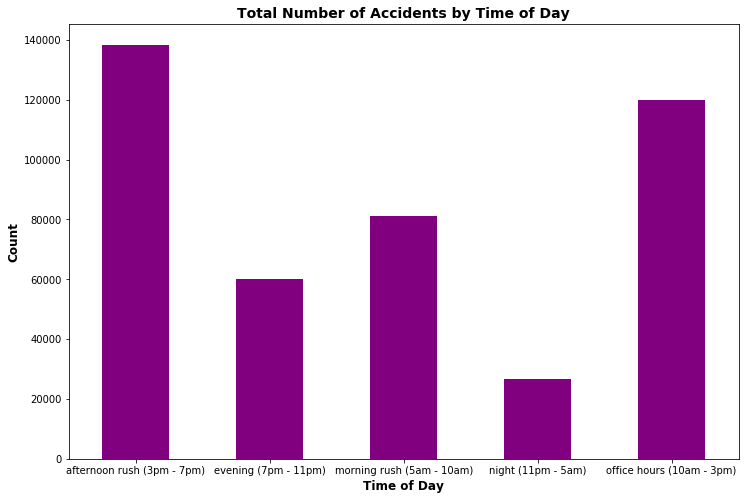

In [53]:
Traffic.groupby('Daytime').size().plot(kind = 'bar', color = 'purple', figsize = (12,8), grid = False)
plt.xticks(np.arange(5),('afternoon rush (3pm - 7pm)', 'evening (7pm - 11pm)', 'morning rush (5am - 10am)','night (11pm - 5am)', 'office hours (10am - 3pm)'),rotation = 'horizontal')
plt.xlabel('Time of Day', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Total Number of Accidents by Time of Day', fontsize = 14, fontweight = 'bold')
plt.show();

In [54]:
Traffic.groupby('Daytime')['Number_of_Casualties'].mean()

Daytime
afternoon rush (3pm - 7pm)    1.333514
evening (7pm - 11pm)          1.372187
morning rush (5am - 10am)     1.265665
night (11pm - 5am)            1.394382
office hours (10am - 3pm)     1.359422
Name: Number_of_Casualties, dtype: float64

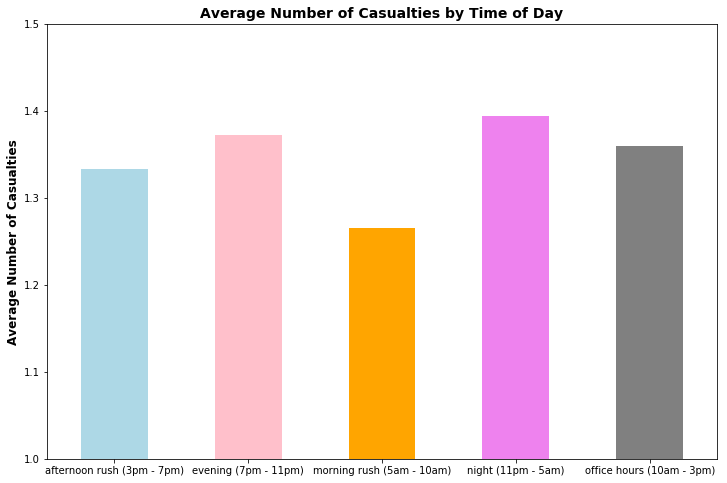

In [55]:
Traffic.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind = 'bar', color = ['lightblue','pink','orange','violet','gray'],figsize = (12,8), grid = False)
plt.xticks(np.arange(5),('afternoon rush (3pm - 7pm)', 'evening (7pm - 11pm)', 'morning rush (5am - 10am)','night (11pm - 5am)', 'office hours (10am - 3pm)'), rotation = 'horizontal')
plt.ylim((1, 1.5))
plt.xlabel('')
plt.ylabel('Average Number of Casualties', fontsize = 12, fontweight = 'bold')
plt.title('Average Number of Casualties by Time of Day', fontsize = 14, fontweight = 'bold')
plt.show()

In [56]:
Traffic['Date'] = pd.to_datetime(Traffic['Date'], format = '%d/%m/%Y')

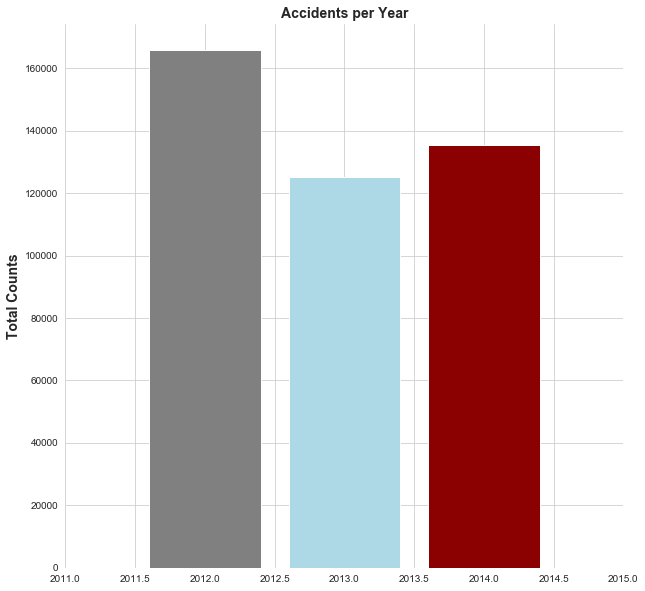

(None,)

In [57]:
# Has the number of accidents increased or decreased over the last few years?

yearly_count = Traffic['Date'].dt.year.value_counts().sort_index(ascending = False)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(yearly_count.index, yearly_count.values, color = ['darkred','lightblue','grey'])
ax.set_title('Accidents per Year', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Total Counts', fontsize = 14, fontweight = 'bold')
plt.xlim(2011,2015)


sns.despine(ax = ax, top = True, right = True, left = True, bottom = True)
plt.show(),

In [58]:
Traffic['Road_Type'].unique()

array(['Single carriageway', 'One way street', 'Roundabout',
       'Dual carriageway', 'Slip road', 'Unknown'], dtype=object)

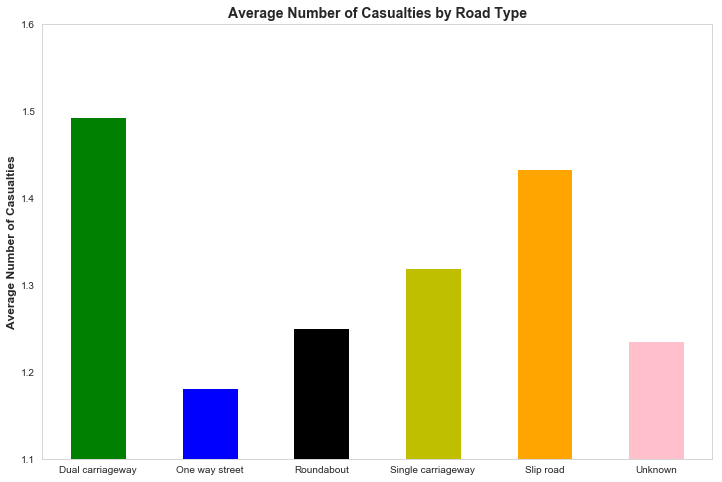

In [59]:
Traffic.groupby('Road_Type')['Number_of_Casualties'].mean().plot(kind = 'bar', color =[ 'green','blue','k','y','orange','pink'], figsize = (12,8), grid = False)
plt.xticks(np.arange(6),('Dual carriageway','One way street','Roundabout','Single carriageway','Slip road','Unknown'), rotation = 'horizontal')
plt.ylim((1.1,1.6))
plt.xlabel('')
plt.ylabel('Average Number of Casualties', fontsize = 12, fontweight = 'bold')
plt.title('Average Number of Casualties by Road Type', fontsize= 14, fontweight = 'bold')
plt.show();

In [60]:
Traffic.groupby('Road_Type')['Number_of_Casualties'].mean()

Road_Type
Dual carriageway      1.492485
One way street        1.181753
Roundabout            1.250493
Single carriageway    1.319109
Slip road             1.433041
Unknown               1.235849
Name: Number_of_Casualties, dtype: float64

In [61]:
Traffic.groupby('Speed_limit')['Number_of_Casualties'].mean()

Speed_limit
20    1.184254
30    1.258670
40    1.438863
50    1.519780
60    1.516781
70    1.590402
Name: Number_of_Casualties, dtype: float64

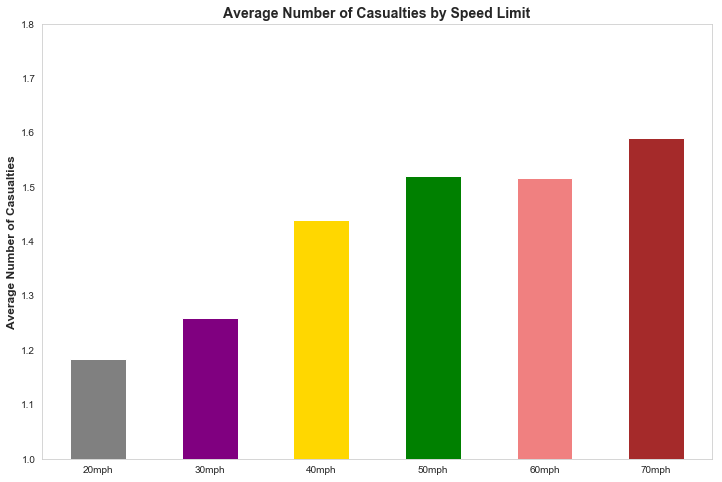

In [62]:
Traffic.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind = 'bar', color =['grey','purple','gold','green','lightcoral','brown'], figsize = (12,8), grid = False)
plt.xticks(np.arange(6),('20mph', '30mph','40mph','50mph','60mph','70mph'), rotation = 'horizontal')
plt.ylim((1.0,1.8))
plt.xlabel('')
plt.ylabel('Average Number of Casualties', fontsize = 12, fontweight = 'bold')
plt.title('Average Number of Casualties by Speed Limit', fontsize = 14, fontweight = 'bold')
plt.show();

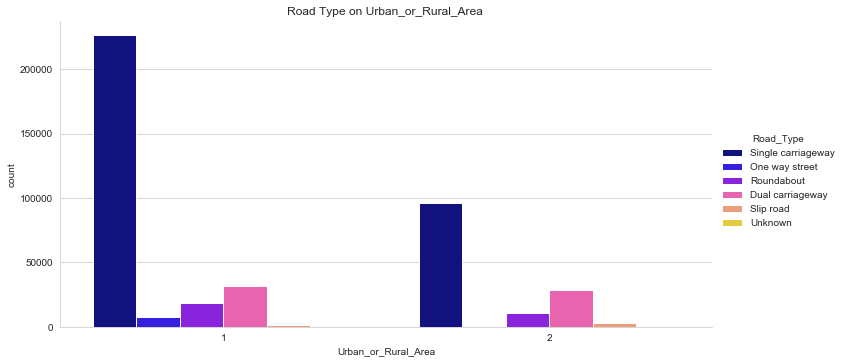

In [63]:
sns.catplot(x='Urban_or_Rural_Area',hue='Road_Type',kind='count',height=5,aspect=2,orient='h',color=True,palette='gnuplot2',legend=True,data=Traffic);
plt.title('Road Type on Urban_or_Rural_Area ')
plt.savefig('Urban or Rural Area.png')

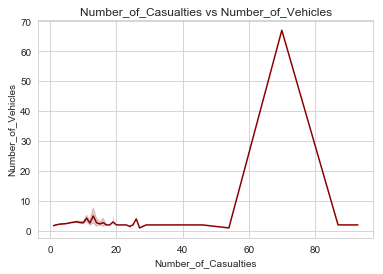

In [64]:
sns.set_palette("Blues")
sns.set_style('whitegrid')
sns.lineplot(x="Number_of_Casualties", y="Number_of_Vehicles",color='darkred' ,data=Traffic)
plt.title('Number_of_Casualties vs Number_of_Vehicles')
plt.savefig('Number of Vehicles vs Casualties.png',dpi=100)

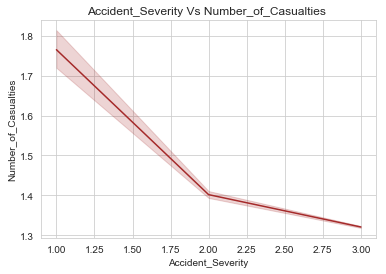

In [65]:
sns.set_palette("Blues")
sns.set_style('whitegrid')
sns.lineplot(x="Accident_Severity", y="Number_of_Casualties",color='brown',estimator='mean',ci=95 ,data=Traffic)
plt.title('Accident_Severity Vs Number_of_Casualties ')
plt.savefig('Accident_Severity.png',dpi=100)

In [66]:
Traffic.groupby('Year')['Number_of_Casualties'].mean()

Year
2012    1.348567
2013    1.327358
2014    1.332053
Name: Number_of_Casualties, dtype: float64

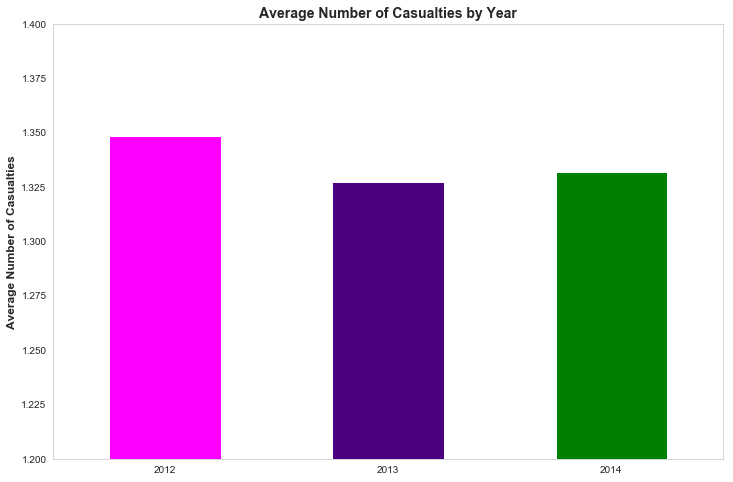

In [67]:
Traffic.groupby('Year')['Number_of_Casualties'].mean().plot(kind = 'bar', color = ['magenta','indigo','green'], figsize = (12,8), grid = False)
plt.xticks(np.arange(3),('2012', '2013','2014'), rotation = 'horizontal')
plt.ylim((1.2,1.4))
plt.xlabel('')
plt.ylabel('Average Number of Casualties', fontsize = 12, fontweight = 'bold')
plt.title('Average Number of Casualties by Year', fontsize = 14, fontweight = 'bold')
plt.show();

In [68]:
Traffic.groupby('Day_of_Week')['Number_of_Casualties'].mean()

Day_of_Week
1    1.428086
2    1.314555
3    1.306013
4    1.302930
5    1.312527
6    1.331819
7    1.398158
Name: Number_of_Casualties, dtype: float64

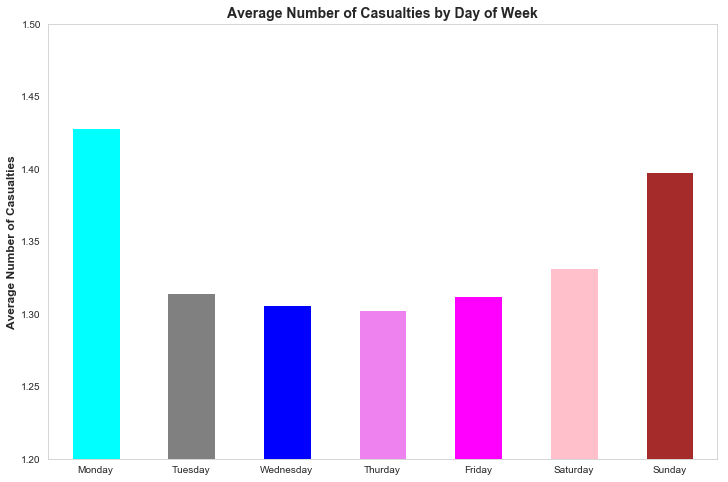

In [69]:
Traffic.groupby('Day_of_Week')['Number_of_Casualties'].mean().plot(kind = 'bar', color = ['cyan','grey','blue','violet','magenta','pink','brown'], figsize = (12,8), grid = False)
plt.xticks(np.arange(7),('Monday', 'Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday'), rotation = 'horizontal')
plt.ylim((1.2,1.5))
plt.xlabel('')
plt.ylabel('Average Number of Casualties', fontsize = 12, fontweight = 'bold')
plt.title('Average Number of Casualties by Day of Week', fontsize = 14, fontweight = 'bold')
plt.show();

In [70]:
Traffic.groupby('Day_of_Week')['Number_of_Casualties'].size()

Day_of_Week
1    45874
2    61010
3    64507
4    64467
5    65236
6    69791
7    55375
Name: Number_of_Casualties, dtype: int64

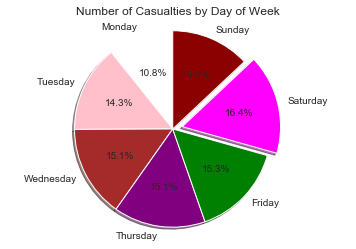

In [71]:
labels = 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
sizes = [45874, 61010, 64507, 64467, 65236, 69791, 55375] 
explode = (0, 0, 0, 0, 0, 0.1, 0) 
color = ['white','pink','brown','purple', 'green','magenta','darkred']

fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = color,autopct = '%1.1f%%', shadow = True, startangle=90) 
ax1.axis('equal')
plt.title('Number of Casualties by Day of Week')
plt.style.use('seaborn')
plt.show();

In [72]:
Traffic.keys()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Hour', 'Daytime'],
      dtype='object')

In [73]:
Traffic.drop(columns=['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Police_Force', 'Local_Authority_(District)','Local_Authority_(Highway)'], axis = 1, inplace = True)
Traffic.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Daytime
0,-0.169101,51.493429,3,2,1,2012-01-19,5,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012,20,evening (7pm - 11pm)
1,-0.200838,51.517931,3,2,1,2012-01-04,4,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012,17,afternoon rush (3pm - 7pm)
2,-0.188636,51.487618,3,2,1,2012-01-10,3,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,10,office hours (10am - 3pm)
3,-0.200259,51.514325,3,1,1,2012-01-18,4,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,12,office hours (10am - 3pm)
4,-0.183773,51.497614,3,1,1,2012-01-17,3,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,20,evening (7pm - 11pm)


In [74]:
Traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426260 entries, 0 to 455907
Data columns (total 27 columns):
Longitude                                      426260 non-null float64
Latitude                                       426260 non-null float64
Accident_Severity                              426260 non-null int64
Number_of_Vehicles                             426260 non-null int64
Number_of_Casualties                           426260 non-null int64
Date                                           426260 non-null datetime64[ns]
Day_of_Week                                    426260 non-null int64
1st_Road_Class                                 426260 non-null int64
1st_Road_Number                                426260 non-null int64
Road_Type                                      426260 non-null object
Speed_limit                                    426260 non-null int64
Junction_Control                               426260 non-null object
2nd_Road_Class                                

In [75]:
Traffic.drop('LSOA_of_Accident_Location', axis = 1, inplace = True)

In [76]:
Traffic['Date'] = pd.to_datetime(Traffic['Date'], format= '%d/%m/%Y')
Traffic['Month'] = Traffic['Date'].dt.month
Traffic['Day'] = Traffic['Date'].dt.day
Traffic.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Hour,Daytime,Month,Day
0,-0.169101,51.493429,3,2,1,2012-01-19,5,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,evening (7pm - 11pm),1,19
1,-0.200838,51.517931,3,2,1,2012-01-04,4,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,17,afternoon rush (3pm - 7pm),1,4
2,-0.188636,51.487618,3,2,1,2012-01-10,3,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,10,office hours (10am - 3pm),1,10
3,-0.200259,51.514325,3,1,1,2012-01-18,4,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,12,office hours (10am - 3pm),1,18
4,-0.183773,51.497614,3,1,1,2012-01-17,3,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,evening (7pm - 11pm),1,17


In [77]:
Traffic.drop('Date', axis = 1, inplace = True)
Traffic.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Hour,Daytime,Month,Day
0,-0.169101,51.493429,3,2,1,5,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,evening (7pm - 11pm),1,19
1,-0.200838,51.517931,3,2,1,4,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,17,afternoon rush (3pm - 7pm),1,4
2,-0.188636,51.487618,3,2,1,3,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,10,office hours (10am - 3pm),1,10
3,-0.200259,51.514325,3,1,1,4,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,12,office hours (10am - 3pm),1,18
4,-0.183773,51.497614,3,1,1,3,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,evening (7pm - 11pm),1,17


In [78]:
Traffic.drop('Daytime', axis = 1, inplace = True)
Traffic.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Hour,Month,Day
0,-0.169101,51.493429,3,2,1,5,3,308,Single carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,1,19
1,-0.200838,51.517931,3,2,1,4,4,412,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,17,1,4
2,-0.188636,51.487618,3,2,1,3,3,3220,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,10,1,10
3,-0.200259,51.514325,3,1,1,4,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012,12,1,18
4,-0.183773,51.497614,3,1,1,3,4,325,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012,20,1,17


In [79]:
pd.DataFrame(Traffic.keys())

,0
0,Longitude
1,Latitude
2,Accident_Severity
3,Number_of_Vehicles
4,Number_of_Casualties
5,Day_of_Week
6,1st_Road_Class
7,1st_Road_Number
8,Road_Type
9,Speed_limit


In [80]:
Traffic['1st_Road_Class'].unique() 

array([3, 4, 5, 6, 1, 2], dtype=int64)

In [81]:
Traffic['Junction_Control'].unique()

array(['Automatic traffic signal', 'Giveway or uncontrolled', 'Stop Sign',
       'Authorised person'], dtype=object)

In [82]:
Traffic_new = pd.get_dummies(Traffic,columns=['Road_Type','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Special_Conditions_at_Site','Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident','Junction_Control','Road_Surface_Conditions'], drop_first = True)
Traffic_new.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,Hour,Month,Day,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,...,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_Stop Sign,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Wet/Damp
0,-0.169101,51.493429,3,2,1,5,3,308,30,5,0,1,2012,20,1,19,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,-0.200838,51.517931,3,2,1,4,4,412,30,6,0,1,2012,17,1,4,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,-0.188636,51.487618,3,2,1,3,3,3220,30,6,0,1,2012,10,1,10,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,-0.200259,51.514325,3,1,1,4,5,0,30,6,0,1,2012,12,1,18,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,-0.183773,51.497614,3,1,1,3,4,325,30,6,0,1,2012,20,1,17,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [83]:
pd.DataFrame(Traffic_new.keys())

,0
0,Longitude
1,Latitude
2,Accident_Severity
3,Number_of_Vehicles
4,Number_of_Casualties
5,Day_of_Week
6,1st_Road_Class
7,1st_Road_Number
8,Speed_limit
9,2nd_Road_Class


In [84]:
Traffic_new.drop(columns = ['Longitude', 'Latitude', '1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number', 'Weather_Conditions_Snowing with high winds','Weather_Conditions_Snowing without high winds'], axis = 1, inplace = True)
Traffic_new.keys()

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Speed_limit', 'Urban_or_Rural_Area', 'Year', 'Hour',
       'Month', 'Day', 'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown',
       'Pedestrian_Crossing-Human_Control_Control by school crossing patrol',
       'Pedestrian_Crossing-Human_Control_None within 50 metres',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Ligh

In [85]:
My_data = Traffic_new.to_csv('Transportation Dataset.csv', index = False)

In [86]:
condition = (Traffic_new['Number_of_Vehicles'] < 6) & (Traffic_new['Number_of_Casualties'] < 9)
Traffic_new = Traffic_new[condition]

In [87]:
Traffic_new['Number_of_Vehicles'].value_counts()

2    259733
1    123918
3     33051
4      7071
5      1530
Name: Number_of_Vehicles, dtype: int64

In [88]:
Traffic_new['Number_of_Casualties'].value_counts()

1    330953
2     65036
3     18713
4      6771
5      2472
6       926
7       297
8       135
Name: Number_of_Casualties, dtype: int64

In [89]:
X=Traffic_new.drop('Number_of_Casualties', axis = 1)
X.shape

(425303, 51)

In [90]:
y=Traffic_new['Number_of_Casualties']
y.shape

(425303,)

In [91]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k = 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
important = pd.DataFrame(featureScores.nlargest(60,'Score'))
important

,Specs,Score
3,Speed_limit,54052.881909
1,Number_of_Vehicles,6828.281456
44,Did_Police_Officer_Attend_Scene_of_Accident_No,4906.771111
4,Urban_or_Rural_Area,1304.237870
45,Did_Police_Officer_Attend_Scene_of_Accident_Yes,1100.820979
48,Junction_Control_Stop Sign,838.874722
19,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,609.815419
6,Hour,599.592430
46,Junction_Control_Automatic traffic signal,535.577977
50,Road_Surface_Conditions_Wet/Damp,455.764808


In [92]:
X.drop(['Carriageway_Hazards_Pedestrian in carriageway (not injured)', 'Pedestrian_Crossing-Human_Control_Control by school crossing patrol','Weather_Conditions_Other','Weather_Conditions_Fine without high winds','Special_Conditions_at_Site_Ol or diesel','Pedestrian_Crossing-Physical_Facilities_Footbridge or subway','Carriageway_Hazards_Other object in carriageway','Special_Conditions_at_Site_Mud','Carriageway_Hazards_Dislodged vehicle load in carriageway','Day_of_Week','Special_Conditions_at_Site_None','Carriageway_Hazards_None','Pedestrian_Crossing-Human_Control_None within 50 metres','Year'], axis = 1, inplace = True)
X.keys()

Index(['Accident_Severity', 'Number_of_Vehicles', 'Speed_limit',
       'Urban_or_Rural_Area', 'Hour', 'Month', 'Day',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Weather_Conditions_Fog or mist',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

In [94]:
from sklearn.preprocessing import StandardScaler
SC_X=StandardScaler()
SC_Y=StandardScaler()

In [95]:
X_train=SC_X.fit_transform(X_train)

In [96]:
X_test=SC_X.fit_transform(X_test)

In [97]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
X_predict = lm.predict(X_train)

In [99]:
print(lm.intercept_)

1.327951174289246


In [100]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Accident_Severity,-0.023813
Number_of_Vehicles,0.179495
Speed_limit,0.057416
Urban_or_Rural_Area,0.031896
Hour,0.018063
Month,-0.006405
Day,0.002400
Road_Type_One way street,-0.002669
Road_Type_Roundabout,-0.023695
Road_Type_Single carriageway,-0.002764


In [101]:
predictions = lm.predict(X_test)
pred = pd.DataFrame(predictions)

In [102]:
pred.rename(columns={0:'Predictions'}, inplace = True)
pred

,Predictions
0,1.307452
1,1.445472
2,1.298279
3,1.292421
4,1.167925
5,1.287965
6,0.891347
7,0.987934
8,1.037464
9,2.013985


In [103]:
Predictions = pred['Predictions'].apply(np.ceil)
pd.DataFrame(Predictions)

,Predictions
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,1.0
7,1.0
8,2.0
9,3.0


In [104]:
y_test.head()

248269    3
294494    1
329563    1
136827    2
13782     1
Name: Number_of_Casualties, dtype: int64

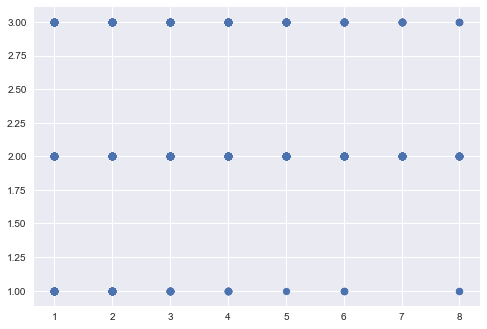

In [105]:
plt.scatter(y_test, Predictions);

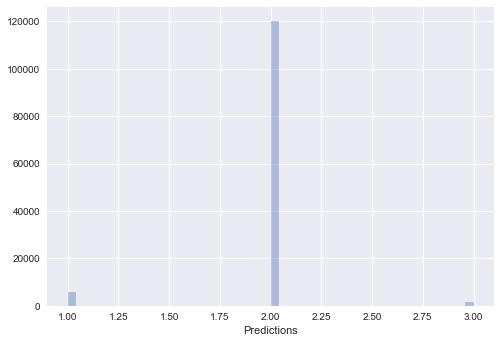

In [106]:
sns.distplot(Predictions, kde = False);

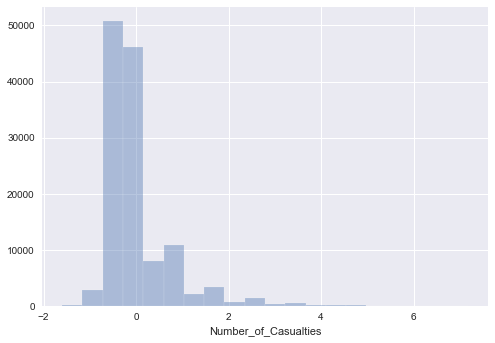

In [107]:
sns.distplot(y_test-predictions, bins = 20, kde = False);

In [108]:
from sklearn import metrics

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.46390623422899374
MSE: 0.5029426122410072
RMSE: 0.7091844698250288


### From the RMSE value above our model has a higher accuracy and can proceed to implementation.